# Python Exercises

Python cheatsheet: https://quickref.me/python.html

Feel free to use any Python function from the built-in functions or typical Python libraries when you consider itappropriate. It is important to not repeat code that is already implemented.

## Dual Sorting Criterion

Given a list of (tuple) pairs:
1. Sort them based on the first element of the pair
    - Example: `[(2, 3), (9, 5), (7, 2)]` → `[(2, 3), (7, 2), (9, 5)]`
2. Sort them based on the second element of the pair.
    - Example: `[(2, 3), (9, 5), (7, 2)]` → `[(7, 2), (2, 3), (9, 5)]`

In [ ]:
def list_of_pairs_sort(l, first=True):
    i = 0 if first else 1
    return sorted(l, key=lambda e: e[i])

In [ ]:
lst = [(2, 3), (9, 5), (7, 2)]
list_of_pairs_sort(lst, first=True)

[(2, 3), (7, 2), (9, 5)]

In [ ]:
list_of_pairs_sort(lst, first=False)

[(7, 2), (2, 3), (9, 5)]

## Dictionary for Counting Repetitions

Given a list containing repetitions, create a dictionary where keys are unique elements from the list, and the values represent the repetition counts.

Example:
    `[1, 2, 2, 2, 3, 3]` → `{1: 1, 2: 3, 3: 2}`

In [1]:
lst = [1, 2, 2, 2, 3, 3]
d = {}

for v in lst:
    d[v] = d.get(v, 0) + 1
d

{1: 1, 2: 3, 3: 2}

## Anagrams

Write a function that returns `True` if two given words are anagrams, and `False` otherwise.

An anagram is when two words contain exactly the same characters in the same frequency, but potentially in a different order. For example, `"act"` and `"tac"` are anagrams because both words use the characters `'a'`, `'c'`, and `'t'`.

In [ ]:
def are_anagrams(a, b):
    return sorted(a.lower()) == sorted(b.lower())

In [ ]:
are_anagrams('act', 'tac')

True

In [ ]:
are_anagrams('aactt', 'tac')

False

## Save a List to a File

Given a list of words, create a text file in your computer that contains the words from the list, in the same order, with one word per line.

In [ ]:
words = ["banana", "apple", "cherry"]

In [ ]:
with open("files/list_ex2.txt", 'w') as f:
    for e in f:
        f.write(e + '\n')

## Read a List from a File

Given a text file containing a word on each line (like the one in the previous exercise), read it and store the words in a list in the same order.

In [ ]:
with open('files/list_ex2.txt', 'r') as f:
    lst_file = [l.strip() for l in f.readlines()]
lst_file

## Combinatorial Numbers

Implement a function that calculates binomial coefficients (also known as elements of Pascal's Triangle) up to a depth of $N$. Print them in a "triangle format".

The binomial coefficient is defined mathematically as:

$\frac{n!}{k!(n−k)!}$

Where $n!$ is the factorial of $n$.

For Pascal’s Triangle, the structure starts with 1 at the top, and every row $n$ contains the binomial coefficients for that row, iterating over $k$ from $0$ to $n$ for computing the elements of the row:

```
      1       <- Row 0: 1 element (n=0, k=0)
     1 1      <- Row 1: 2 elements (n=1, k=0,1)
    1 2 1     <- Row 2: 3 elements (n=2, k=0,1,2)
   1 3 3 1    <- Row 3: 4 elements (n=3, k=0,1,2,3)
  1 4 6 4 1   <- Row 4: 5 elements (n=4, k=0,1,2,3,4)
```

Write a function called `pascal(N)` for displaying Pascal's triangle up to a given number depth of $N$, which specifies the number of rows of the triangle.

You can use `factorial()` function from `math` module to compute the factorial of a number.

In [19]:
from math import factorial

def pascal(n):
    for i in range(n):
        for j in range(n-i+1):
            print(end=" ")

        for j in range(i+1):
            print(factorial(i) // (factorial(j) * factorial(i-j)), end=' ')

        print()

In [20]:
pascal(5)

      1 
     1 1 
    1 2 1 
   1 3 3 1 
  1 4 6 4 1 


## Robot Movement

- A robot moves on a plane starting from point (0,0).
- The robot can move UP, DOWN, LEFT, and RIGHT.
- The robot's movement trail is given as input string like: `UP 5 DOWN 3 LEFT 3 RIGHT 2`, where the numbers after the direction are the number of steps in that direction.

Write a program to calculate the Euclidean distance from the current position after a sequence of movements to the original point. The Euclidean distance between two points (x1, y1) and (x2, y2) is defined as:

    Euclidean distance = SQRT((x1 - x2)^2 + (y1 - y2)^2),

where SQRT is the square root (√).

Example: 
- Input: UP 5 DOWN 3 LEFT 3 RIGHT 2
- Output: 2.24 (rounded to 2 decimals)

In [24]:
import math

In [27]:
def robot_distance(props):
    pos = [0, 0]
    new_prop = props.split(' ')
    
    for x in range(len(new_prop)):
        if new_prop[x].upper() == 'UP':
            pos[0] += int(new_prop[x+1])
        elif new_prop[x].upper() == 'DOWN':
            pos[0] -= int(new_prop[x+1])
        elif new_prop[x].upper() == 'LEFT':
            pos[1] -= int(new_prop[x+1])
        elif new_prop[x].upper() == 'RIGHT':
            pos[1] += int(new_prop[x+1])

    print(f'End pos: {tuple(pos)}')
    
    return round(math.sqrt(pos[0]**2 + pos[1]**2), 2)

In [28]:
robot_distance('UP 5 DOWN 3 LEFT 3 RIGHT 2')

End pos: (2, -1)


2.24

## Color by Proximity — Nearest Neighbors

Write a function:

`predict_color(points, new_point, k)`

that **predicts** the color of a new point in 2D space based on its **k** nearest neighbors.

Each point is represented as a tuple `(x, y, color)`, where:

- `x` and `y` are coordinates,
- `color` is a string (e.g. "red", "blue", "green").

The function should:

1. Compute the **Euclidean distance** between the new point and each existing point.
2. Select the **k points with the smallest distances**.
3. Predict (return) the color as the **majority color** among those k neighbors.
    - If there’s a tie between two or more colors, you can return any of them.


This is a simplified version of a ML algorithm called k-Nearest Neighbors (kNN) that we will see in class.

In [9]:
# Example data
points = [
    (1.5, 1.8, "red"),
    (2.0, 2.1, "red"),
    (2.2, 1.9, "red"),
    (1.8, 2.3, "red"),
    (2.1, 2.4, "red"),
    (2.7, 1.8, "green"),
    (3.0, 2.2, "green"),
    (3.2, 1.9, "green"),
    (2.8, 2.4, "green"),
    (3.1, 2.5, "green"),
    (3.3, 2.8, "blue"),
    (3.5, 3.1, "blue"),
    (3.7, 2.9, "blue"),
    (3.4, 3.3, "blue"),
    (3.6, 3.2, "blue"),
]

In [21]:
# These are examples only, here we can have any other value
new_point = (3, 2.8)
k = 5

In [22]:
import math
from collections import Counter

def predict_color(points, new_point, k):
    # Compute distances
    distances = []
    for x, y, color in points:
        dist = math.sqrt((x - new_point[0])**2 + (y - new_point[1])**2)
        distances.append((dist, color))
    
    # Sort by distance and take k nearest
    distances.sort(key=lambda x: x[0])
    nearest_colors = [color for _, color in distances[:k]]
    
    # Majority vote
    most_common = Counter(nearest_colors).most_common(1)[0][0]
    return most_common

Predicted color: green


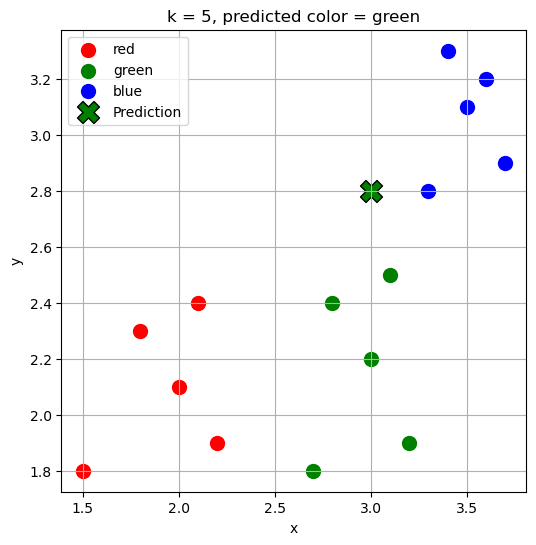

In [ ]:
# This code assumes you've implemented the `predict_color` function that returns a color prediction

import matplotlib.pyplot as plt

predicted_color = predict_color(points, new_point, k)
print("Predicted color:", predicted_color)

plt.figure(figsize=(6,6))
for x, y, color in points:
    plt.scatter(x, y, c=color, s=100, label=color if color not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_point[0], new_point[1], c=predicted_color, s=250, edgecolors='black', marker='X', label="Prediction")
plt.legend()
plt.title(f"k = {k}, predicted color = {predicted_color}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## kNN Bonus

Extend the previous **Color by proximity** exercise by implementing the following extras:

1. **Distance function**: Add another parameter to the `predict_color()` function called `dist_fn`, which represents the distance function used to calculate how close two points are.

    Previously, you "hardcoded" the Euclidean distance, but now your function should use whatever distance function is passed as a parameter — so a programmer can choose the distance metric.

    For example, try computing distances using the **Manhattan distance**:
        `Manhattan distance = |x1 - x2| + |y1 - y2|`

2. **Weighted vote**: Instead of a simple majority vote for predicting the color, give **closer neighbors higher influence**. The idea is that nearer points should “count more” toward the final prediction.

    You can assign each neighbor a weight inversely proportional to its distance, such as: `weight = 1 / distance`. To handle the case where the distance is 0 (the new point exactly matches an existing one), you can return the color of that point immediately.

    Your goal is to sum the weights of the neighbors for each color and predict the color with the largest total weight.

In [26]:
import math
from collections import defaultdict


def predict_color(points, new_point, k, dist_fn):
    """
    Predicts the color of a new point based on k nearest neighbors.
    
    Parameters
    ----------
    points : list of tuples (x, y, color)
        The known data points with their associated colors.
    new_point : tuple (x, y)
        The point to predict.
    k : int
        The number of nearest neighbors to consider.
    dist_fn : function
        A distance function that takes two points and returns a numeric distance.
    """
    # Compute all distances
    distances = []
    for x, y, color in points:
        dist = dist_fn((x, y), new_point)
        distances.append((dist, color))
    
    # Sort by distance and take k nearest
    distances.sort(key=lambda x: x[0])
    nearest = distances[:k]
    
    # Weighted voting: weight = 1 / distance
    weights = {}
    for dist, color in nearest:
        if dist == 0:
            # Exact match — immediately return that color
            return color
        weights[color] = weights.get(color, 0) + (1 / dist)
    
    # Pick color with largest total weight
    predicted_color = max(weights, key=weights.get)
    return predicted_color

In [27]:
# Example distance functions
def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

Predicted color: blue


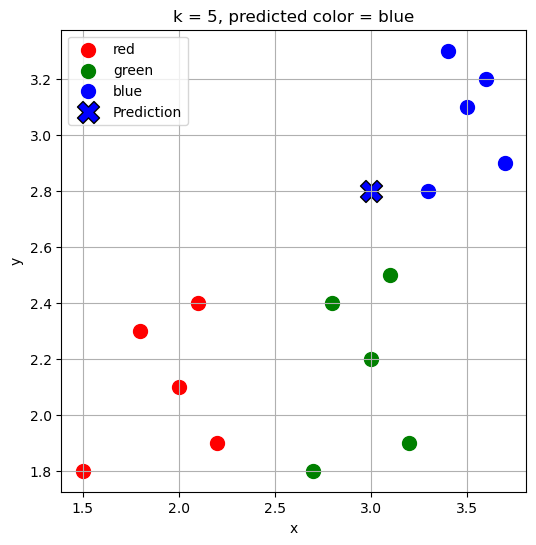

In [29]:
# This code assumes you've implemented the `predict_color` function that returns a color prediction

import matplotlib.pyplot as plt

predicted_color = predict_color(points, (3, 3), k, manhattan)
print("Predicted color:", predicted_color)

plt.figure(figsize=(6,6))
for x, y, color in points:
    plt.scatter(x, y, c=color, s=100, label=color if color not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_point[0], new_point[1], c=predicted_color, s=250, edgecolors='black', marker='X', label="Prediction")
plt.legend()
plt.title(f"k = {k}, predicted color = {predicted_color}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Pig

Create a program that simulates the Pig dice game for multiple players. 

Pig Game Basics:
- Players take turns rolling a six-sided die.
- On their turn, a player can choose to continue rolling or hold.
- If they roll a 1, they score nothing, and their turn ends.
- If they roll 2-6, they can "hold" and add the sum of their rolls to their total score or risk rolling again.
- If a player holds, the turn goes to the next player.
- The first player to reach or exceed 100 points wins.

Implement the basic game for $N$ players.

For example, given players Alice, Bob and Charlie:

- Turn 1: Alice
    - Rolls: 4 → Turn total = 4
    - Decides to roll again
    - Rolls: 3 → Turn total = 7
    - Decides to hold → Alice total = 7

- Turn 2: Bob
    - Rolls: 5 → Turn total = 5
    - Rolls again
    - Rolls: 1 → Pig! Turn ends → Bob total = 0

- Turn 3: Charlie
    - Rolls: 2 → Turn total = 2
    - Rolls again
    - Rolls: 6 → Turn total = 8
    - Holds → Charlie total = 8

- Turn 4: Alice
    - Rolls: 3 → Turn total = 3
    - Rolls again
    - Rolls: 2 → Turn total = 5
    - Holds → Alice total = 12  (this is adding the previous Alice total of 7 points to this turn's total 5)

- ETC.

In [9]:
import random
import time

In [10]:
def roll_die():
    return random.randint(1, 6)

def play_turn(player_name):
    turn_total = 0
    while True:
        roll = roll_die()
        print(f"{player_name} rolled a {roll}")
        
        if roll == 1:
            return 0
        else:
            turn_total += roll
            print(f"{player_name}'s turn total is {turn_total}.")
            
            choice = input("Do you want to roll again or hold? (roll/hold) ").strip().lower()
            time.sleep(0.5)
            if choice == "hold":
                return turn_total
            elif choice == "roll":
                continue
            elif choice == "end":
                return -1
            else:
                print(f"Invalid choice ({choice}). Only \"roll\", \"hold\", or \"end\" are valid options. Try again.")
                continue

def run_pig(n_players):
    scores = [0] * n_players
    player_names = [f"Player {i+1}" for i in range(n_players)]
    
    while max(scores) < 100:
        for i in range(n_players):
            print(f"\n{player_names[i]}'s turn!")
            print(f"{player_names[i]}'s total score is {scores[i]}.")
            print('-' * 20)

            turn_score = play_turn(player_names[i])
            if turn_score == -1:
                print("Game has been prematurely ended.")
                return
            scores[i] += turn_score
            
            if scores[i] >= 100:
                print(f"{player_names[i]} wins!")
                return

In [11]:
n = int(input("Enter the number of players: "))
run_pig(n)


Player 1's turn!
Player 1's total score is 0.
--------------------
Player 1 rolled a 6
Player 1's turn total is 6.
Player 1 rolled a 5
Player 1's turn total is 11.
Player 1 rolled a 2
Player 1's turn total is 13.
Player 1 rolled a 6
Player 1's turn total is 19.

Player 2's turn!
Player 2's total score is 0.
--------------------
Player 2 rolled a 6
Player 2's turn total is 6.
Player 2 rolled a 1

Player 1's turn!
Player 1's total score is 19.
--------------------
Player 1 rolled a 4
Player 1's turn total is 4.
Player 1 rolled a 4
Player 1's turn total is 8.
Player 1 rolled a 2
Player 1's turn total is 10.
Player 1 rolled a 2
Player 1's turn total is 12.
Player 1 rolled a 2
Player 1's turn total is 14.
Player 1 rolled a 3
Player 1's turn total is 17.

Player 2's turn!
Player 2's total score is 0.
--------------------
Player 2 rolled a 5
Player 2's turn total is 5.
Game has been prematurely ended.


## Pig AI

After establishing the basic game (previous exercise), enhance it with an AI player that uses the Monte Carlo tree search method for decision-making.

In [3]:
def simulate_turn(current_score):
    # Simulate a turn using a simple Monte Carlo method
    simulations = 1000
    total_points = 0
    
    for _ in range(simulations):
        turn_total = 0
        while True:
            roll = roll_die()
            if roll == 1:
                break
            else:
                turn_total += roll
                # Stop simulation if score goes beyond a certain threshold or wins the game
                if current_score + turn_total >= 100 or turn_total > 20:
                    break
        
        total_points += turn_total
    
    # Average points over simulations
    return total_points / simulations

def ai_turn(current_score):
    turn_total = 0
    while True:
        expected_points = simulate_turn(current_score + turn_total)
        
        # If expected points from simulation is low, hold. Otherwise, roll again.
        if expected_points < 15:
            return turn_total
        else:
            roll = roll_die()
            print("AI rolled a", roll)
            if roll == 1:
                return 0
            turn_total += roll

def play_pig_with_ai(n_players, n_ais):
    scores = [0] * n_players
    player_types = ["AI" if i < n_ais else "Human" for i in range(n_players)]
    
    while max(scores) < 100:
        for i in range(n_players):
            print(f"\nPlayer {i+1}'s turn!")
            
            if player_types[i] == "AI":
                scores[i] += ai_turn(scores[i])
            else:
                scores[i] += play_turn(f"Player {i+1}")
                
            print(f"Player {i+1}'s total score is {scores[i]}.")
            print('-' * 20)
            
            if scores[i] >= 100:
                print(f"Player {i+1} wins!")
                return

# Play with N players and M AI players
n = int(input("Enter the total number of players: "))
m = int(input("Enter the number of AI players: "))
play_pig_with_ai(n, m)


Player 1's turn!
Player 1's total score is 0.


Player 2's turn!
Player 2 rolled a 1
Player 2's total score is 0.


Player 1's turn!
Player 1's total score is 0.


Player 2's turn!
Player 2 rolled a 5
Player 2's turn total is 5.
